In [1]:
from sklearn.linear_model import LinearRegression
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime as dt
import pandas as pd
import numpy as np
import os

%matplotlib inline
mpl.rcParams["axes.labelsize"] = 24
mpl.rcParams["axes.titlesize"] = 24
mpl.rcParams["xtick.labelsize"] = 18
mpl.rcParams["ytick.labelsize"] = 22
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["legend.fontsize"] = 17
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["image.cmap"] = "viridis"

ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
ALL_DIR = os.path.join(ROOT_DIR, "data", "All.csv")


In [2]:
def line_plot_resonance(data, title, xlabel="", ylabel=""):
    fig, ax = plt.subplots(figsize=(25, 3.5))
    ax.locator_params(axis="x", nbins=12)
    beginning = dt.date(2022, 1, 1)
    end = dt.date(2023, 1, 1)
    ax.plot(data.index.values, data["Resonance"], color="black", linewidth=1)
    ax.vlines(x=['2022-04-01'], ymin=-2.5, ymax=2.5, color="k", linewidth=1, linestyle=":")
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title, xbound=(beginning, end), ylim=[-1, 1.001])
    date_form = DateFormatter("%b-%y")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(date_form)
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks([-1,0,1])
    ticks = [tick for tick in ax.xaxis.get_majorticklabels()]
    ticks[0].set_horizontalalignment("left")
    return fig


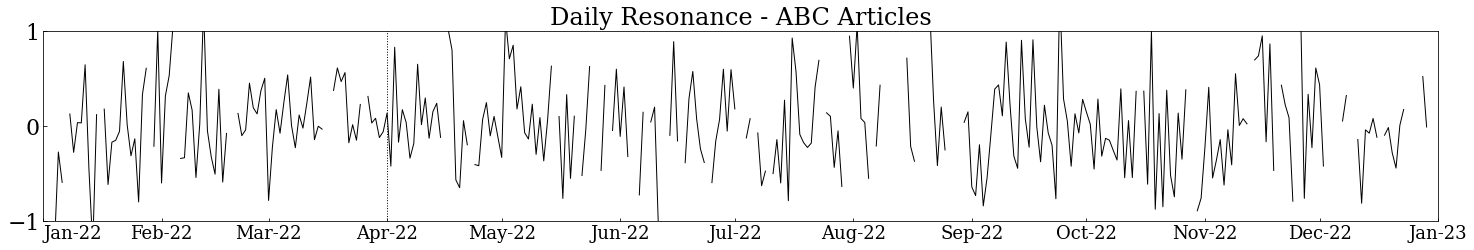

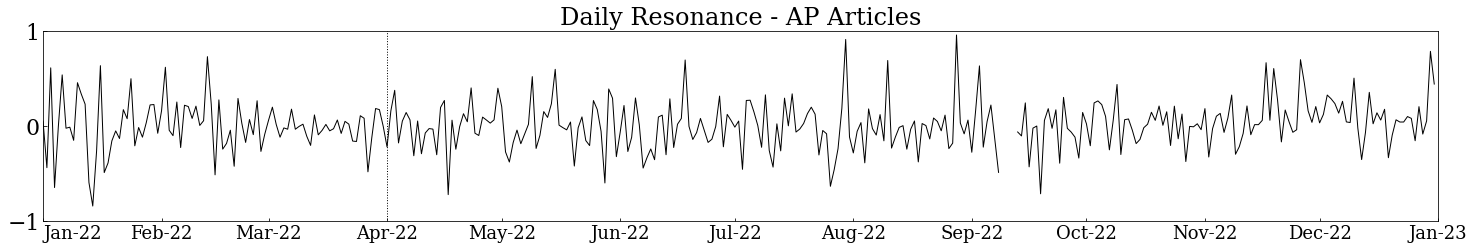

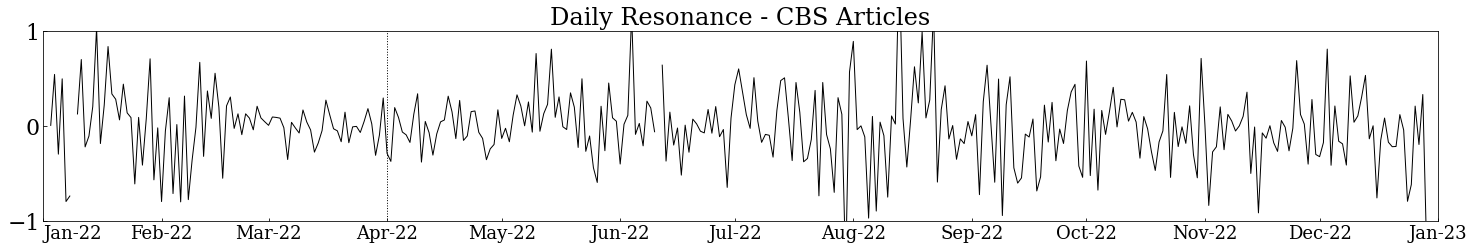

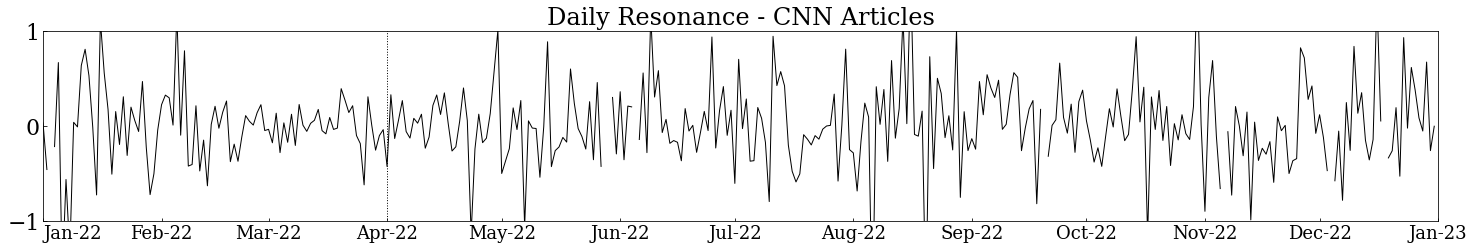

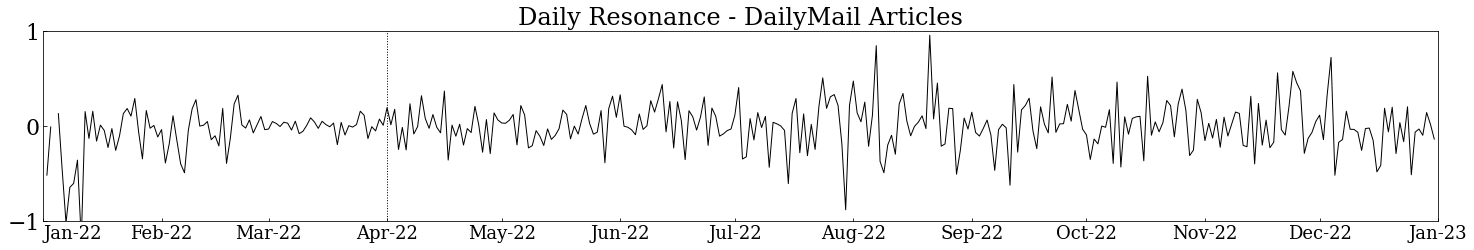

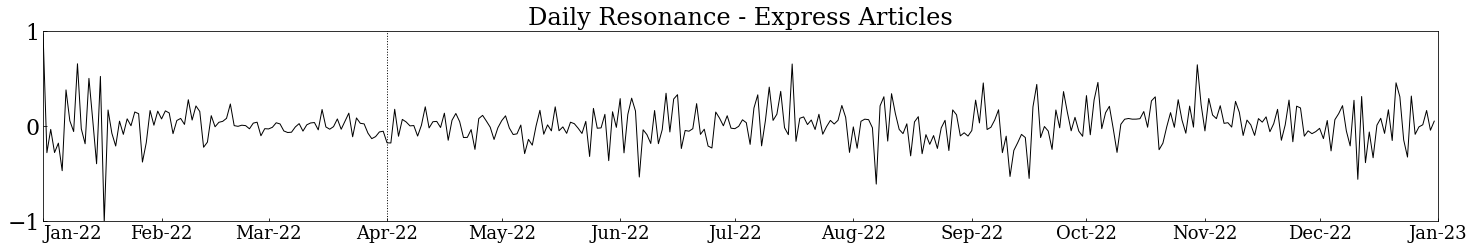

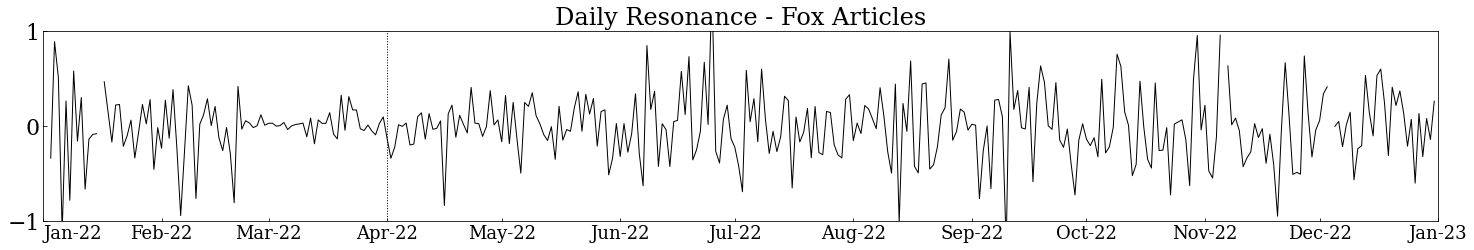

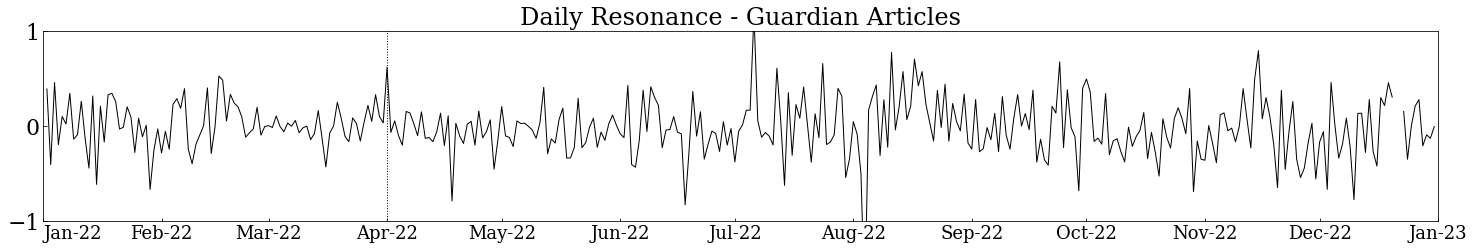

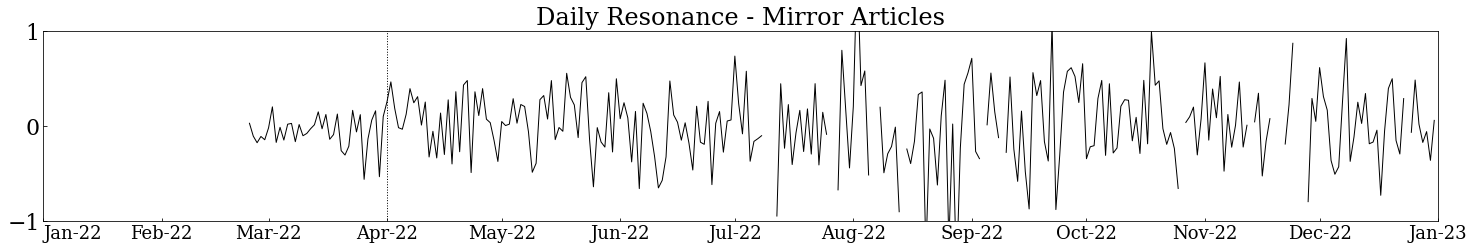

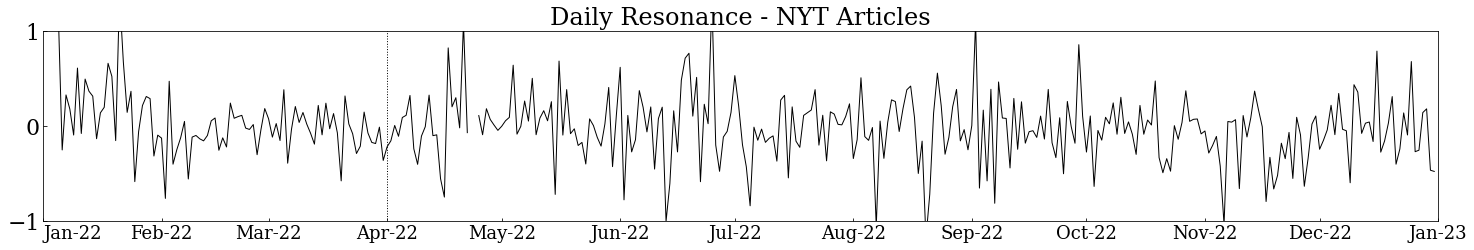

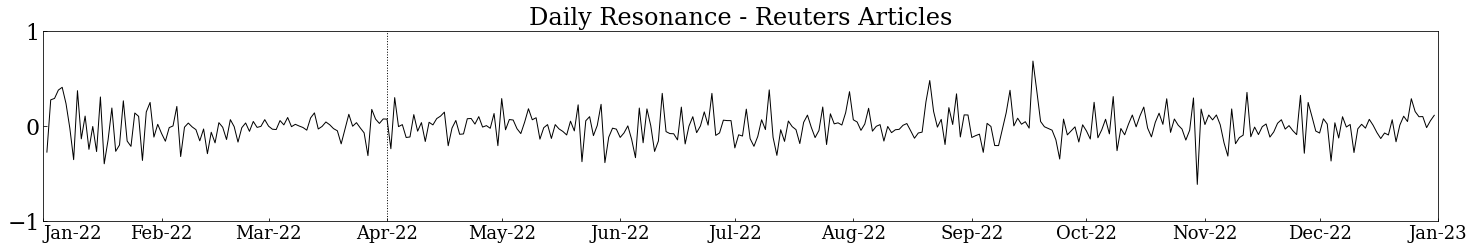

In [3]:
sources = [
    "ABC",
    "AP",
    "CBS",
    "CNN",
    "DailyMail",
    "Express",
    "Fox",
    "Guardian",
    "Mirror",
    "NYT",
    "Reuters",
    ]

windows = [1]

for window in windows:
    for source in sources:
        data_df = pd.read_csv(os.path.join(ROOT_DIR, "results_10", "All_Results.csv"), parse_dates=["Date"], index_col=["Date"])
        data_df = data_df.query(f"Source == '{source}'")
        davg_df = data_df.drop(columns=["Title", "Text", "URL", "Topic"]).resample("D").mean()
        dcount_df = data_df.resample("D").apply({"URL": "count"})

        fig = line_plot_resonance(davg_df, f"Daily Resonance - {source} Articles")
        fig.savefig(os.path.join(ROOT_DIR, "figures","resonance_series", source + f"_Resonance_Daily_{window}.svg"), format="svg", dpi=1000, bbox_inches="tight")
